### Homework 2.3 - 2D Temperature Distribution

Solve 2D heat equation for the following initial conditions:

$$\begin{array}{l}
u(x,0) = \sin (2\pi x)\\
u(x,1) = \sin (2\pi x)\\
u(0,y) = \sin (3\pi y)\\
u(1,y) = \sin (\pi y)
\end{array}$$

where $u(x, y)$ represent the steady state temperature distribution on 2D plane.
 
Plot the 2D heat map of the solution.

$${u_{i,j}} = \frac{1}{4}\left[ {{u_{i + 1,j}} + {u_{i - 1,j}} + {u_{i,j + 1}} + {u_{i,j - 1}}} \right]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [153]:
nx=100
ny=100
errtol = 0.0022
frames = []
U = np.zeros((nx,ny))
for i in range(nx):
    U[i][0]=np.sin(2*np.pi*i/nx)
for i in range(nx):
    U[i][-1]=np.sin(2*np.pi*i/nx)
for i in range(ny):
    U[0][i]=np.sin(3*np.pi*i/ny)
for i in range(ny):
    U[-1][i]=np.sin(np.pi*i/ny)

difmat= np.zeros((nx,ny))
difmats=[]
_=0
e=1
while e > errtol:
    _ +=1
    frame = U.copy()
    frames.append(frame)
    
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            U[i][j]=0.25*(U[i+1][j]+U[i-1][j]+U[i][j+1]+U[i][j-1])
            
    difmat = frame - U
    difcop=difmat.copy()
    difmats.append(difcop)
    e = np.linalg.norm(difcop)
print(_)

1994


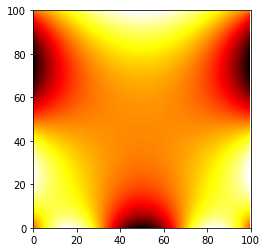

In [154]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 100), ylim=(0, 100))
plt.imshow(U,cmap='hot')

<function matplotlib.pyplot.show(close=None, block=None)>

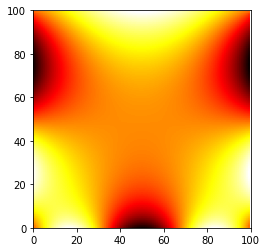

In [155]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 100), ylim=(0, 100))
line = plt.imshow(frames[i],cmap="hot")


def animate(i):
    line.set_array(frames[i])
    return line

anim = animation.FuncAnimation(fig, animate, frames=(len(frames)), repeat=False)
anim.save('heatmapanimation.mp4', fps = 100)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

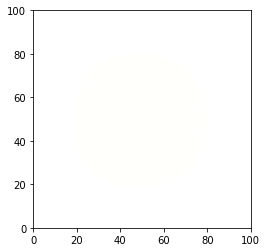

In [150]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 100), ylim=(0, 100))
line = plt.imshow(difmats[i],cmap="hot")


def animate(i):
    line.set_array(difmats[i])
    return line

anim = animation.FuncAnimation(fig, animate, frames=len(difmats), repeat=False)
anim.save('heatmaperror.mp4', fps = 100)
plt.show